In [2]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [43]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/POWERGRID.csv")

In [44]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-10-05,POWERGRID,EQ,52.00,89.8,109.50,83.15,100.20,100.60,102.49,481058927,4.930561e+15,NaN,181390171,0.3771
1,2007-10-08,POWERGRID,EQ,100.60,104.0,104.00,94.85,95.30,95.45,98.12,71252858,6.991616e+14,NaN,22115293,0.3104
2,2007-10-09,POWERGRID,EQ,95.45,95.5,102.85,90.35,102.10,101.95,98.57,65658228,6.471784e+14,NaN,16991920,0.2588
3,2007-10-10,POWERGRID,EQ,101.95,104.6,105.00,102.00,102.65,102.90,103.66,38211410,3.960887e+14,NaN,16409289,0.4294
4,2007-10-11,POWERGRID,EQ,102.90,120.0,120.00,102.00,114.85,114.40,110.78,59805552,6.625235e+14,NaN,17530826,0.2931


In [45]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3359 entries, 0 to 3358
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3359 non-null   object 
 1   Symbol              3359 non-null   object 
 2   Series              3359 non-null   object 
 3   Prev Close          3359 non-null   float64
 4   Open                3359 non-null   float64
 5   High                3359 non-null   float64
 6   Low                 3359 non-null   float64
 7   Last                3359 non-null   float64
 8   Close               3359 non-null   float64
 9   VWAP                3359 non-null   float64
 10  Volume              3359 non-null   int64  
 11  Turnover            3359 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3359 non-null   int64  
 14  %Deliverble         3359 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 393.8

In [46]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3359.000000,3359.000000,3359.000000,3359.000000,3359.000000,3359.000000,3359.000000,3.359000e+03,3.359000e+03,2456.000000,3.359000e+03,3359.000000
mean,141.332123,141.497246,143.342513,139.468309,141.372715,141.382152,141.426859,6.019073e+06,8.986049e+13,38764.626221,3.501519e+06,0.591903
std,41.954289,41.993967,42.299214,41.696305,41.929357,41.947928,41.965621,1.244297e+07,1.601171e+14,28682.079786,6.577419e+06,0.149282
min,52.000000,61.700000,62.000000,52.000000,59.150000,58.000000,55.980000,3.406300e+04,3.824913e+11,412.000000,1.172700e+04,0.153100
25%,104.400000,104.475000,105.825000,103.100000,104.450000,104.425000,104.495000,2.339470e+06,2.681986e+13,18770.250000,1.310524e+06,0.487250
50%,133.050000,133.000000,134.850000,131.250000,133.000000,133.050000,133.200000,3.947345e+06,5.318995e+13,32081.000000,2.325513e+06,0.617200
75%,185.075000,185.475000,187.875000,182.925000,185.250000,185.150000,185.325000,6.629918e+06,1.039562e+14,50584.500000,4.051940e+06,0.702900
max,236.500000,234.400000,238.300000,228.750000,235.250000,236.500000,234.930000,4.810589e+08,4.930561e+15,350022.000000,1.856564e+08,0.997200


In [47]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [48]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [49]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [50]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [51]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [52]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [53]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
3354,3.962536,3.650336,215.80,10765892,NaN
3355,2.177943,0.277713,216.65,8589721,NaN
3356,2.496533,0.959781,220.90,9215766,NaN
3357,2.099977,-1.322277,220.15,8303610,NaN
3358,2.607893,1.056257,220.05,9504624,NaN


In [54]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_9868\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [55]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [56]:
#Define the prediction model
model = RandomForestRegressor()

In [57]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [58]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.9415658456966409


In [59]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [60]:
predictions = model.predict(X_Check)

In [61]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

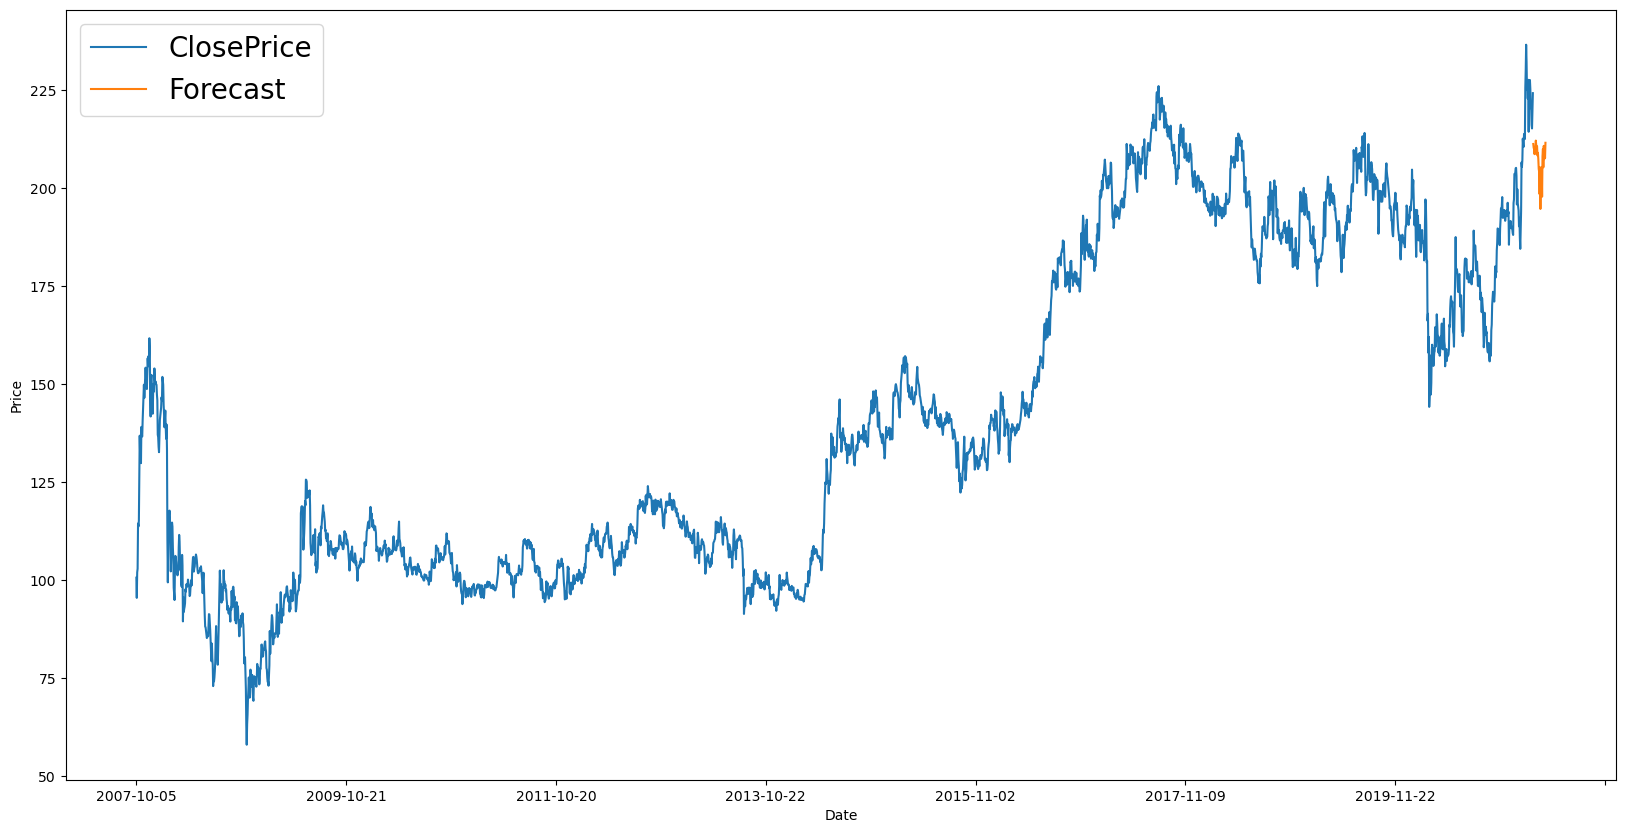

In [62]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')